# *Импорт модулей*

In [157]:
import pandas as pd
import numpy as np
import umap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


plt.style.use('seaborn-colorblind')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


# *Загрузка dataset*

In [36]:
df = pd.read_csv("german_credit_data.csv")

### Что внутри?

In [37]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [39]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [40]:
df = df.dropna()

Удаление нулевых значений

In [41]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [42]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

## EDA

In [43]:
print(' Статистика числовых переменных: ')
df.describe().T

 Статистика числовых переменных: 


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,522.0,493.522989,291.131014,1.0,233.5,502.5,736.75,999.0
Age,522.0,34.888889,11.787918,19.0,26.0,31.5,41.00,75.0
Job,522.0,1.875479,0.682811,0.0,2.0,2.0,2.00,3.0
Credit amount,522.0,3278.745211,2929.155177,276.0,1297.5,2326.5,3971.25,18424.0
Duration,522.0,21.339080,12.474079,6.0,12.0,18.0,26.75,72.0


In [44]:
print('Cтатистика категориальных переменных: : ')
df.describe(include='object').T


Cтатистика категориальных переменных: : 


,count,unique,top,freq
Sex,522,2,male,354
Housing,522,3,own,349
Saving accounts,522,4,little,412
Checking account,522,3,little,245
Purpose,522,8,car,173


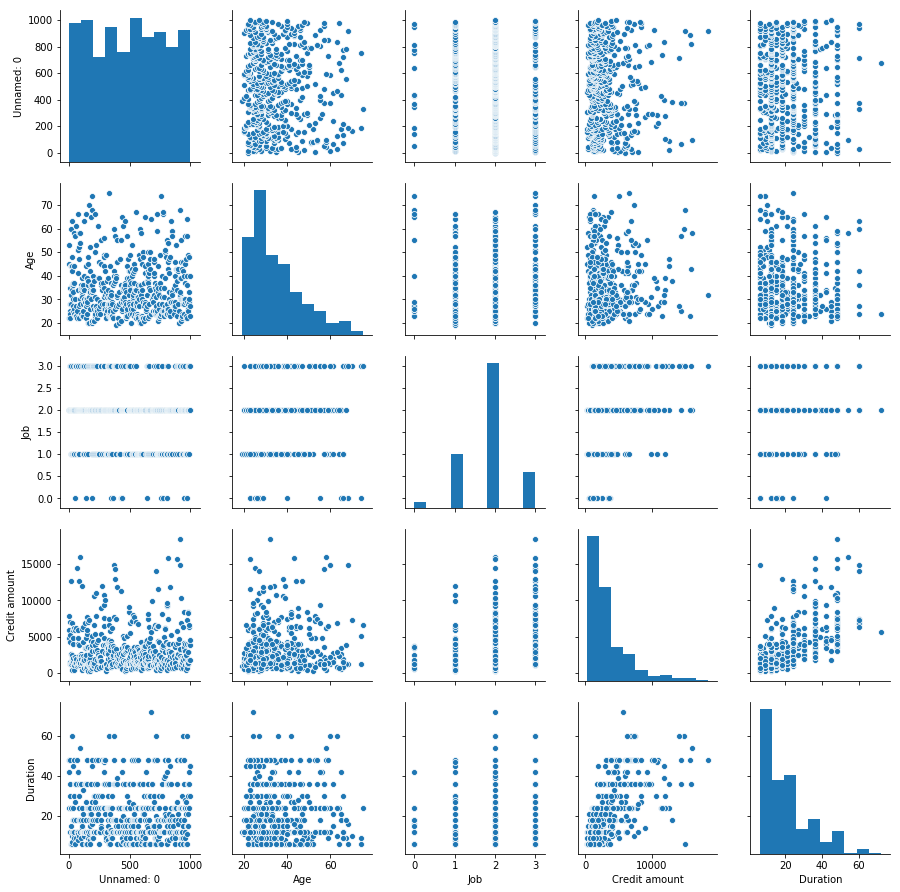

In [45]:
sns.pairplot(df)

Визуализации набора данных

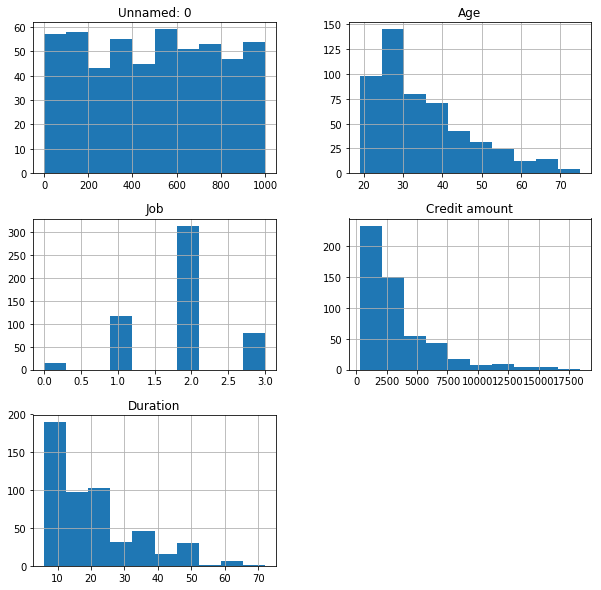

In [46]:
df.hist(figsize=(10,10));

- Возраст клиентов (большее колличество в возрасте от 25  до 30);
- Сумма кредитов уменьшается экспонециально;
- Максимальное колличество кредитов были взяты на срок 1-2 лет;
- Наибольшее колличество клиентов с 2 работами.

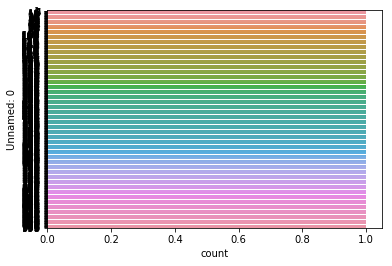

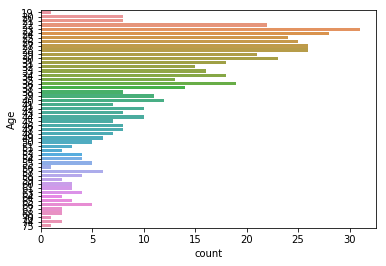

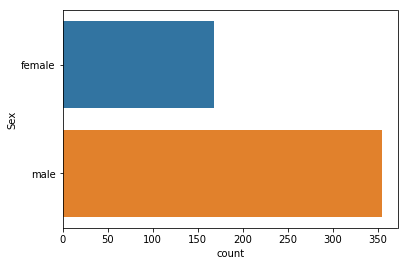

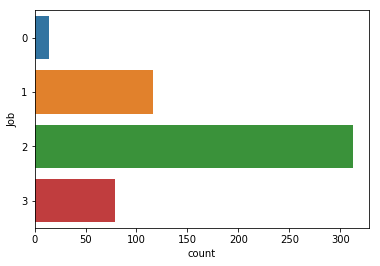

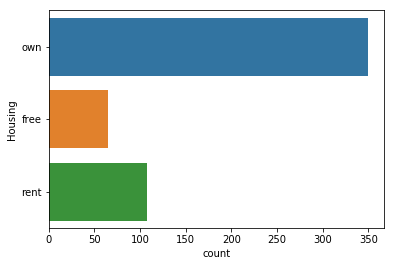

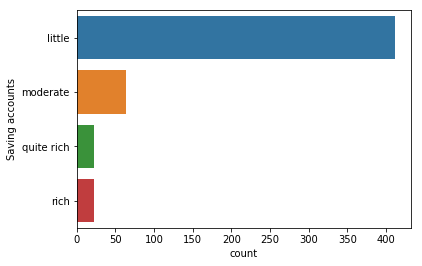

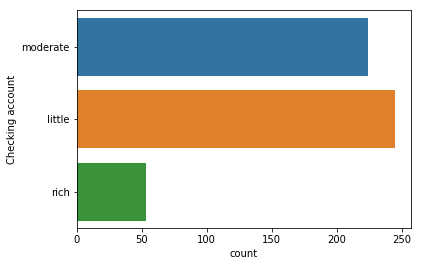

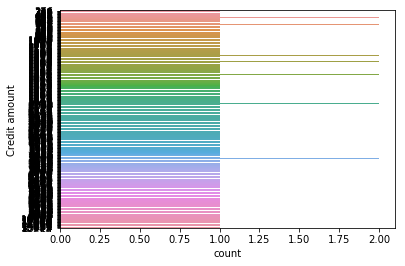

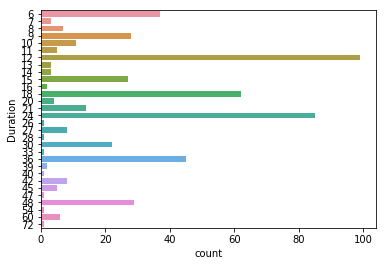

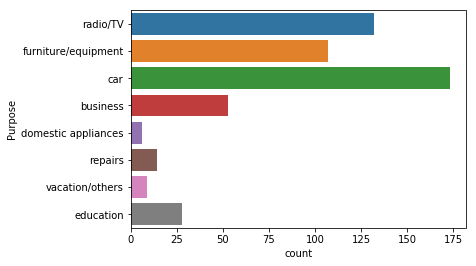

In [47]:
for col in df.columns:
    sns.countplot(y =col, data = df)
    plt.show()

 - У мужчин больше заявок на кредит;
 - Рабочих во втором классе больше (скорее всего работающие);
 - Клиентов, у которых есть собственность, больше чем у которых нет;
 - Бедные люди больше кредитуются;
 - Больше кредитов брали на машины, телевизоры и мебель.




## Preprocessing

In [48]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Удалим ненужный столбец

In [49]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car


In [50]:
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account','Purpose']

#### Кодирование категориальных переменных в числовые

In [246]:
encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for label in categorical_features:
    df[label] = encoder.fit_transform(df[label])

In [247]:
df[categorical_features]

,Sex,Housing,Saving accounts,Checking account,Purpose
1,0,1,0,1,5
3,1,0,0,0,4
4,1,0,0,0,1
7,1,2,0,1,1
9,1,1,0,1,1
...,...,...,...,...,...
989,1,1,0,1,5
993,1,1,0,0,4
996,1,1,0,0,1
998,1,0,0,0,5


### Нормализация

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,-1.094447,-1.451600,0.18254,-0.144578,-0.451116,0.557302,0.913171,2.139356,1.063306
1,0.858575,0.688895,0.18254,-1.899688,-0.451116,-0.957863,1.573037,1.657897,0.561456
2,1.537887,0.688895,0.18254,-1.899688,-0.451116,-0.957863,0.543768,0.213521,-0.944093
3,0.009435,0.688895,1.64848,1.610532,-0.451116,0.557302,1.253868,1.176438,-0.944093
4,-0.584963,0.688895,1.64848,-0.144578,-0.451116,0.557302,0.668155,0.694979,-0.944093


In [162]:
X_scaled

array([[-1.09444711, -1.4516001 ,  0.18254035, ...,  0.9131705 ,
         2.13935578,  1.06330622],
       [ 0.85857489,  0.68889496,  0.18254035, ...,  1.57303731,
         1.65789696,  0.56145645],
       [ 1.53788689,  0.68889496,  0.18254035, ...,  0.54376811,
         0.21352053, -0.94409287],
       ...,
       [ 0.43400489,  0.68889496,  1.64847973, ...,  0.19760287,
         0.69497934, -0.94409287],
       [-1.00953311,  0.68889496,  0.18254035, ..., -0.48994349,
         1.89862637,  1.06330622],
       [-0.66987711,  0.68889496,  0.18254035, ...,  0.44330159,
         1.89862637, -0.94409287]])


Стандартизация данных рекомендуется, потому что в противном случае диапазон значений в каждой функции будет действовать как вес при определении способа кластеризации данных, что обычно нежелательно.

## Часть 2. Моделирование

### Снижение размерности для визуализации

#### tSNE

In [163]:
from sklearn.manifold import TSNE

In [164]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)

In [165]:
X_tsne.shape

(522, 2)

In [166]:
X_scaled.shape

(522, 9)

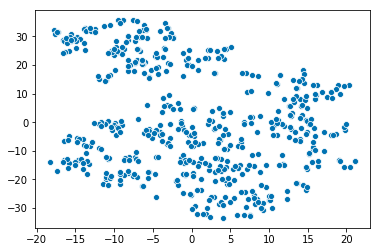

In [167]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

### PCA

In [168]:
from sklearn.decomposition import PCA

In [169]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [170]:
X_pca.shape

(522, 2)

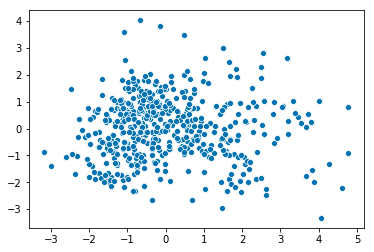

In [171]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1]);

### UMAP

In [172]:
import umap.umap_ as umap

In [253]:
reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_scaled)

SystemError: CPUDispatcher(<function smooth_knn_dist at 0x7f39c9ad8ea0>) returned a result with an error set

In [174]:
X_umap.shape

NameError: name 'X_umap' is not defined

### K-Means

In [56]:
from sklearn.cluster import KMeans

In [57]:
inertia =  []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertia.append(kmeans.inertia_)

In [58]:
inertia

[3992.040952633667,
 3557.22522663633,
 3218.842538305856,
 2980.6973497496037,
 2816.8486295007733,
 2678.2518400638205,
 2556.8373030843177,
 2461.7526605968737,
 2389.77075307681,
 2318.848785040071,
 2239.7147154227146,
 2201.3416185407364,
 2143.792083292087,
 2082.8064112300567]

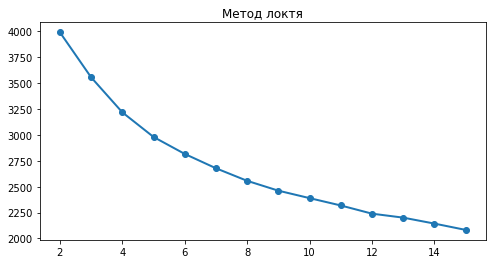

In [59]:
plt.figure(figsize=(8,4))
plt.title('Метод локтя')
plt.plot(np.arange(2,16),inertia, marker='o', lw=2);

Применение логтевого метода для поиска наилучшего колличества кластеров

In [60]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

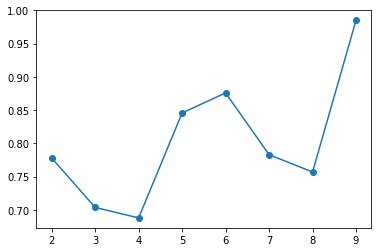

In [61]:
plt.plot(range(2,10), D, marker='o');

In [62]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(X_scaled)
labels_kmeans = kmeans.labels_

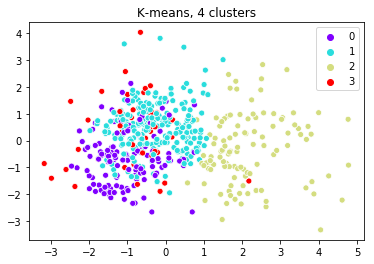

In [175]:
plt.title('K-means, 4 clusters')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=labels_kmeans, palette='rainbow');

In [176]:
data_clustered = df.copy()
data_clustered['cluster_kmeans'] = labels_kmeans

In [178]:
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
989,48,1,1,1,0,1,1743,24,5
993,30,1,3,1,0,0,3959,36,4
996,40,1,3,1,0,0,3857,30,1
998,23,1,2,0,0,0,1845,45,5
999,27,1,2,1,1,1,4576,45,1


### Numerical

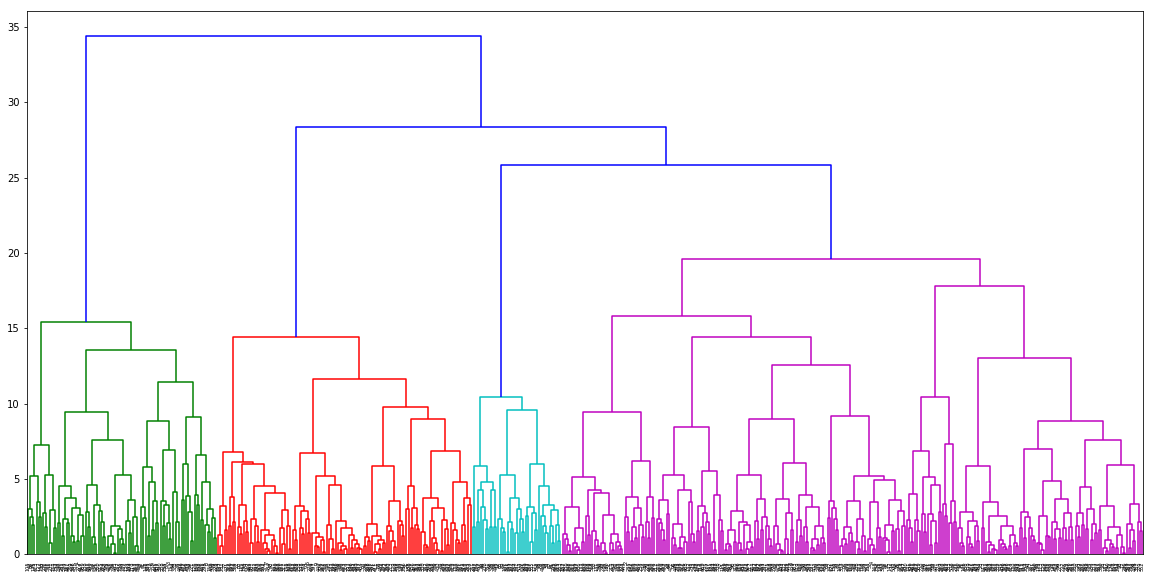

In [179]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

Оптимальное коллиество кластеров 3-4

In [180]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 49.62it/s]


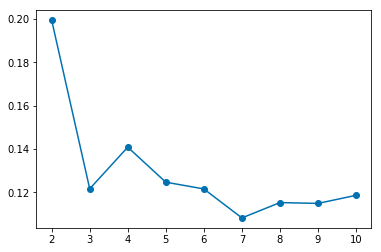

In [181]:
plt.plot(range(2,11), silhouette, marker='o');

In [186]:
agg_cluster = AgglomerativeClustering(n_clusters = 4).fit(X_scaled)
labels_agg = agg_cluster.labels_

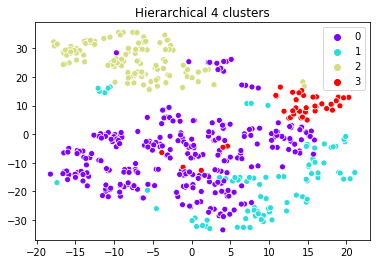

In [188]:
plt.title('Hierarchical 4 clusters')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=agg_cluster.labels_,  palette='rainbow');

In [189]:
data_clustered['cluster_agg'] = labels_agg

### DBSCAN

In [206]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(X_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████| 19/19 [00:00<00:00, 67.24it/s]


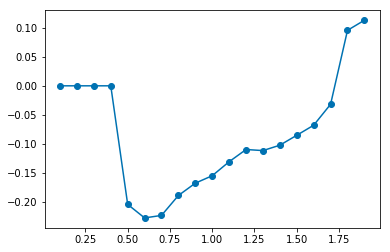

In [207]:
plt.plot(eps_range, silhouette, marker='o');

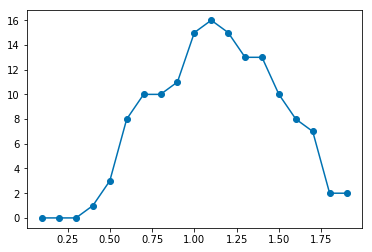

In [209]:
plt.plot(eps_range, clusters, marker='o');

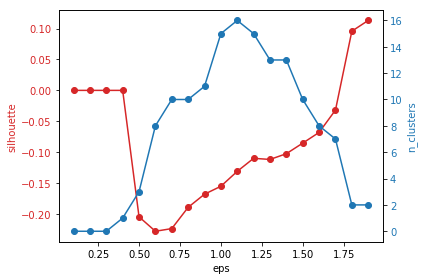

In [210]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Создание экземпляра второй оси, которая разделяет ту же ось X
color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # В противном случае правая метка Y слегка обрезается
plt.show()

## Часть 3. Интерпретация

In [213]:
data_clustered.groupby('cluster_kmeans').mean()[['Age', 'Job', 'Credit amount', 'Duration']]


,Age,Job,Credit amount,Duration
cluster_kmeans,,,,
0,31.100775,1.728682,2038.286822,16.728682
1,35.135021,1.751055,2231.590717,17.113924
2,38.459459,2.378378,7356.603604,37.477477
3,35.644444,1.711111,2291.022222,17.000000


In [215]:
data_clustered['cluster_kmeans'].value_counts()

1    237
0    129
2    111
3     45
Name: cluster_kmeans, dtype: int64

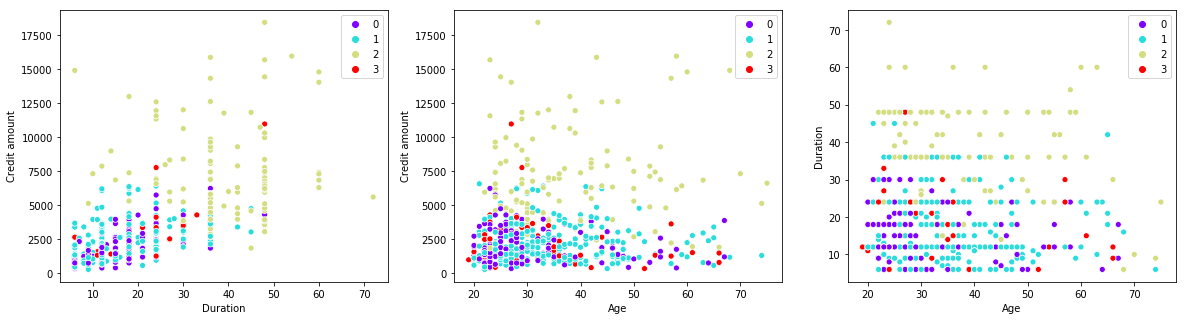

In [216]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x = data_clustered['Duration'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[0], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[1], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Duration'], hue=labels_kmeans, ax=ax[2], palette='rainbow');

In [226]:
num = ['Age', 'Job', 'Credit amount', 'Duration']

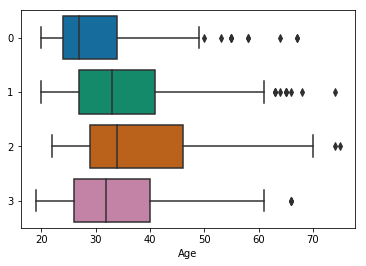

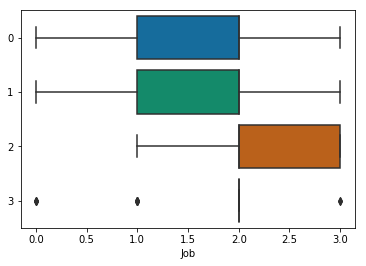

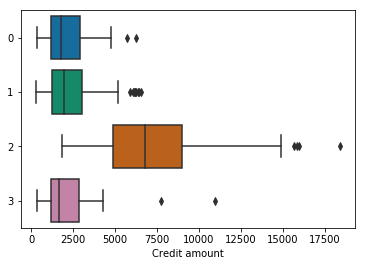

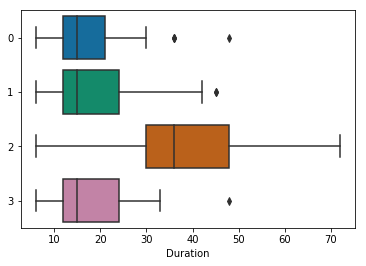

In [227]:
for col in data_clustered[num].columns:
    sns.boxplot(data=data_clustered, x=col, y=labels_kmeans, orient='h')
    plt.show();

### Cluster 0

In [233]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1


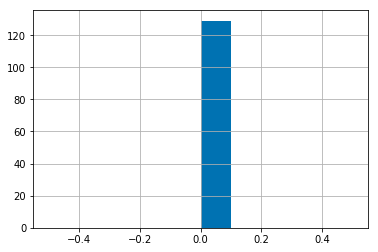

In [228]:
data_clustered[data_clustered['cluster_kmeans']==0]['Sex'].hist()

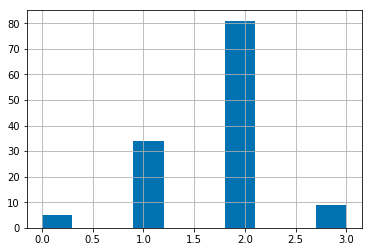

In [229]:
data_clustered[data_clustered['cluster_kmeans']==0]['Job'].hist()

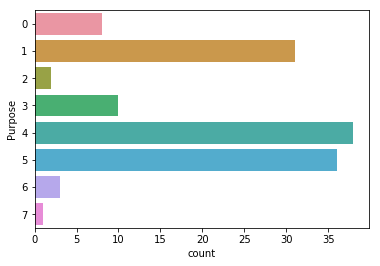

In [230]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==0])
plt.show()

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               522 non-null    int64
 1   Sex               522 non-null    int64
 2   Job               522 non-null    int64
 3   Housing           522 non-null    int64
 4   Saving accounts   522 non-null    int64
 5   Checking account  522 non-null    int64
 6   Credit amount     522 non-null    int64
 7   Duration          522 non-null    int64
 8   Purpose           522 non-null    int64
dtypes: int64(9)
memory usage: 60.8 KB


### Cluster 1

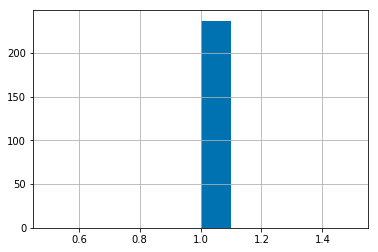

In [252]:
data_clustered[data_clustered['cluster_kmeans']==1]['Sex'].hist()

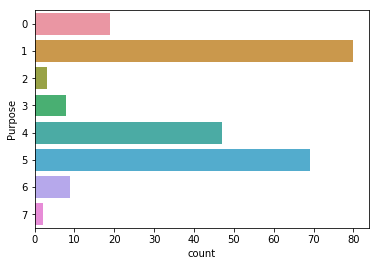

In [260]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==1])
plt.show()

### Cluster 2

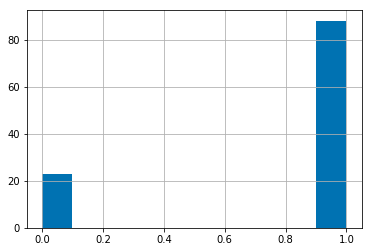

In [274]:
data_clustered[data_clustered['cluster_kmeans']==2]['Sex'].hist()

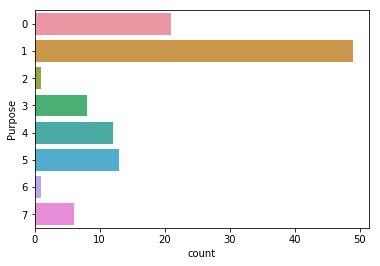

In [275]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==2])
plt.show()

### Cluster 3

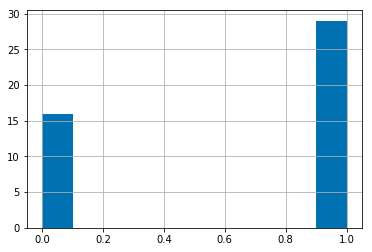

In [265]:
data_clustered[data_clustered['cluster_kmeans']==3]['Sex'].hist()

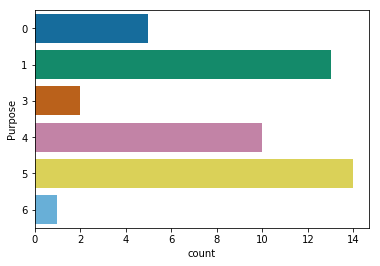

In [268]:
sns.countplot(y = 'Purpose', data =data_clustered[data_clustered['cluster_kmeans']==3])


 - Кластер 0 имеет среднюю сумму кредита продолжительностью на 15 месяцев. В этом кластере только мужчины; 
 - Кластер 1 имеет среднюю сумму кредита также продолжительностью на 15 месяцев. В этом кластере только женщины; 
 - Кластер 2 меет самую высокую среднюю сумму кредита и и самую длинную среднюю продолжительность (35 месяцев). В этом кластере в основном женщины; 
 - Кластер 3 имеет самую низкую среднюю сумму кредита с самой низкой средней суммой кредита продолжительностью на 15 месяцев. В этом кластере больше женщин,чем мужчины; Для всех кластеров основным назначением является мебель и радио/телевидение.